In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams.update({"font.size": 12})
%matplotlib inline

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacytextblob.spacytextblob import SpacyTextBlob
import json

In [ ]:
!pip3 install spacymoji==2.0.0
!pip3 uninstall spacy -y
!pip3 install spacy==3

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
submissions_json = "/content/drive/MyDrive/WSB/submission_data_pushshift_score1_20211020_clean.json"

In [ ]:
from pathlib import Path
# read json
p = Path(submissions_json)

with p.open('r', encoding='utf-8') as f:
    data = json.loads(f.read())



In [ ]:
list(data[0].keys())

['all_awardings',
 'allow_live_comments',
 'author',
 'author_flair_css_class',
 'author_flair_richtext',
 'author_flair_text',
 'author_flair_type',
 'author_fullname',
 'author_is_blocked',
 'author_patreon_flair',
 'author_premium',
 'awarders',
 'can_mod_post',
 'contest_mode',
 'created_utc',
 'domain',
 'full_link',
 'gildings',
 'id',
 'is_created_from_ads_ui',
 'is_crosspostable',
 'is_meta',
 'is_original_content',
 'is_reddit_media_domain',
 'is_robot_indexable',
 'is_self',
 'is_video',
 'link_flair_background_color',
 'link_flair_css_class',
 'link_flair_richtext',
 'link_flair_template_id',
 'link_flair_text',
 'link_flair_text_color',
 'link_flair_type',
 'locked',
 'media_only',
 'no_follow',
 'num_comments',
 'num_crossposts',
 'over_18',
 'parent_whitelist_status',
 'permalink',
 'pinned',
 'pwls',
 'retrieved_on',
 'score',
 'selftext',
 'send_replies',
 'spoiler',
 'stickied',
 'subreddit',
 'subreddit_id',
 'subreddit_subscribers',
 'subreddit_type',
 'suggested_sor

In [ ]:
len(data)

861752

In [ ]:
a = set([1, 2, 3,5])
b = set([2, 3, 4,10])

print(list(b-a)[0])

10


In [ ]:
cols = [
 'author', 
 'created_utc',  
 'id', 
'link_flair_text',
 'num_comments', 
 'score',
  'subreddit_subscribers',   
 'selftext', 
 'title', 'upvote_ratio'

]


df_data = []

for doc in data:
  #cols =list(doc.keys())
  #print(list(doc.keys()))
  #print(list(doc.values()))
  #df_data.append(list(doc.values()))
  #break
    if  doc.keys() >= set(cols):
        lst =  [doc['author'], doc['created_utc'],doc['id']
                ,doc[ 'link_flair_text'], 
                doc['num_comments'],doc[ 'score'],
                doc[ 'subreddit_subscribers'],doc['selftext'],doc['title'],
                doc['upvote_ratio']          
                ]
        df_data.append(lst)
    else:
      missing_keys = list(set(cols) - doc.keys())
      if (len(missing_keys) == 1) and (missing_keys[0] == 'selftext'):
        #print('selftext')
        lst =  [doc['author'], doc['created_utc'],doc['id']
                  ,doc[ 'link_flair_text'], 
                  doc['num_comments'],doc[ 'score'],
                  doc[ 'subreddit_subscribers'],"NA",doc['title'],
                  doc['upvote_ratio']          
                  ]
        df_data.append(lst)
      elif(len(missing_keys) == 1) and (missing_keys[0] == 'upvote_ratio'):
        #print('upvote_ratio')
        lst =  [doc['author'], doc['created_utc'],doc['id']
                  ,doc[ 'link_flair_text'], 
                  doc['num_comments'],doc[ 'score'],
                  doc[ 'subreddit_subscribers'],doc['selftext'],doc['title'],
                  0          
                  ]
        df_data.append(lst)
      elif(len(missing_keys) == 1) and (missing_keys[0] == 'link_flair_text'):
        #print('upvote_ratio')
        lst =  [doc['author'], doc['created_utc'],doc['id']
                  ,"NA", 
                  doc['num_comments'],doc[ 'score'],
                  doc[ 'subreddit_subscribers'],doc['selftext'],doc['title'],
                   doc['upvote_ratio']            
                  ]
        df_data.append(lst)
      elif ((len(missing_keys) == 2) and (missing_keys[0] == 'link_flair_text') and (missing_keys[1] == 'upvote_ratio')):
          #print('upvote_ratio and link_flair_text')
          lst =  [doc['author'], doc['created_utc'],doc['id']
                  ,"NA", 
                  doc['num_comments'],doc[ 'score'],
                  doc[ 'subreddit_subscribers'],doc['selftext'],doc['title'],
                  0          
                  ]
          df_data.append(lst)
      elif ((len(missing_keys) == 2) and (missing_keys[0] == 'upvote_ratio') and (missing_keys[1] == 'selftext')):
          #print('upvote_ratio and link_flair_text')
          lst =  [doc['author'], doc['created_utc'],doc['id']
                 ,doc[ 'link_flair_text'],
                  doc['num_comments'],doc[ 'score'],
                  doc[ 'subreddit_subscribers'],"NA",doc['title'],
                  0          
                  ]
          df_data.append(lst)
      elif ((len(missing_keys) == 2) and (missing_keys[0] == 'link_flair_text') and (missing_keys[1] == 'selftext')):
          #print('upvote_ratio and link_flair_text')
          lst =  [doc['author'], doc['created_utc'],doc['id']
                 ,"NA",
                  doc['num_comments'],doc[ 'score'],
                  doc[ 'subreddit_subscribers'],"NA",doc['title'],
                  doc['upvote_ratio']           
                  ]
          df_data.append(lst)
      elif ((len(missing_keys) == 3) and (missing_keys[0] == 'link_flair_text') and (missing_keys[1] == 'upvote_ratio')):
          #print('upvote_ratio and link_flair_text')
          lst =  [doc['author'], doc['created_utc'],doc['id']
                 ,"NA",
                  doc['num_comments'],doc[ 'score'],
                  doc[ 'subreddit_subscribers'],"NA",doc['title'],
                  0           
                  ]
          df_data.append(lst)
      else:
        print(missing_keys)
        #print(doc) 
        #print(doc.values()) 
        

df = pd.DataFrame(data=df_data,columns=cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861752 entries, 0 to 861751
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   author                 861752 non-null  object 
 1   created_utc            861752 non-null  int64  
 2   id                     861752 non-null  object 
 3   link_flair_text        861752 non-null  object 
 4   num_comments           861752 non-null  int64  
 5   score                  861752 non-null  int64  
 6   subreddit_subscribers  861752 non-null  int64  
 7   selftext               861752 non-null  object 
 8   title                  861752 non-null  object 
 9   upvote_ratio           861752 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 65.7+ MB


In [ ]:
cols = [
 'author', 
 'created_utc',  
 'id', 
'link_flair_text',
 'num_comments', 
 'score',
  'subreddit_subscribers',   
 'selftext', 
 'title', 'upvote_ratio'

]


df_data = []

for doc in data:
    if  doc.keys() >= set(cols):
        lst =  [doc['author'], doc['created_utc'],doc['id']
                ,doc[ 'link_flair_text'], 
                doc['num_comments'],doc[ 'score'],
                doc[ 'subreddit_subscribers'],doc['selftext'],doc['title'],
                doc['upvote_ratio']          
                ]
        df_data.append(lst)
        
        

#df = pd.DataFrame(data=df_data, columns=cols)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861752 entries, 0 to 861751
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   author                 861752 non-null  object 
 1   created_utc            861752 non-null  int64  
 2   id                     861752 non-null  object 
 3   link_flair_text        861752 non-null  object 
 4   num_comments           861752 non-null  int64  
 5   score                  861752 non-null  int64  
 6   subreddit_subscribers  861752 non-null  int64  
 7   selftext               861752 non-null  object 
 8   title                  861752 non-null  object 
 9   upvote_ratio           861752 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 65.7+ MB


In [3]:
df.to_csv("/content/drive/MyDrive/WSB/WSB_submissions_all.csv", sep=";")

NameError: ignored

In [ ]:
df.head()

,author,created_utc,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio
0,VendiVendiVendi,1634666337,qbh10s,Gain,0,1,10967090,So 13.56 cad for BB. It’s moving and gaining ...,BB,1.0
1,Far_Bass_7284,1634666269,qbh04w,News,1,1,10967087,,Surely it is a coincidence.,1.0
2,HistoricalAnimator43,1634666124,qbgyco,YOLO,0,1,10967076,,yolo sava options,1.0
3,ZaRaWi,1634666091,qbgxy8,YOLO,0,1,10967076,,meme,1.0
4,CuteInterest1884,1634665953,qbgw9u,DD,0,1,10967075,"BB is on the move higher, not because of the p...",BB,1.0


In [ ]:
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

In [ ]:
#set created_utc as index
#df.set_index('created_utc')

df.index = pd.DatetimeIndex(df.created_utc)


In [ ]:
df.tail()

,author,created_utc,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio
created_utc,,,,,,,,,,
2018-12-31 15:05:18,Leading_Breath,2018-12-31 15:05:18,ab7upy,NA,417,1,454678,,"""I don't give a shit about Tesla I just want t...",0.0
2018-12-31 14:45:20,skitty2,2018-12-31 14:45:20,ab7oz6,NA,8,1,454674,The whole next year will be green.,If today closes green,0.0
2018-12-31 14:40:30,Googs84,2018-12-31 14:40:30,ab7nkw,Shitpost,0,1,454672,Happy New Year to all you degenerates includin...,Happy New Year Degenerates,0.0
2018-12-31 14:34:10,neocoff,2018-12-31 14:34:10,ab7lu7,NA,7,1,454672,,Chip stocks set for worst quarter in a decade....,0.0
2018-12-31 14:29:50,Brodmann,2018-12-31 14:29:50,ab7km1,Discussion,2,1,454671,,Aphria down 7% premarket; Questions Surface if...,0.0


# 3. Exploratory Data Analysis

## 3.1. Number of submissions

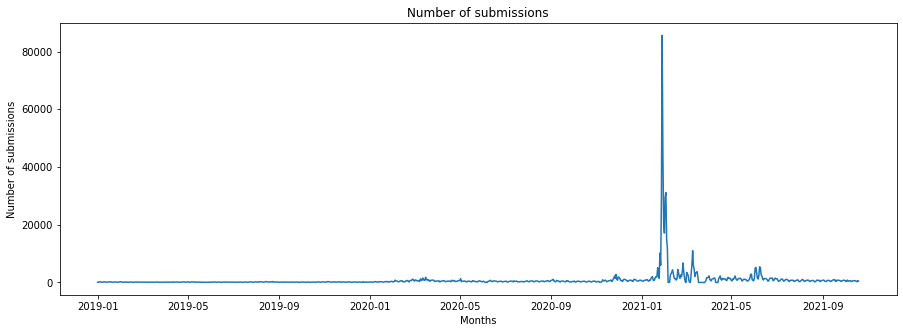

In [ ]:
df_submissions = df.groupby(pd.Grouper(freq="D"))["id"].count()
 

plt.figure(figsize=(15,5))
plt.plot(df_submissions)
plt.xlabel("Months")
plt.ylabel("Number of submissions")
plt.title("Number of submissions")
plt.show()

## 3.2. Number of subscribers

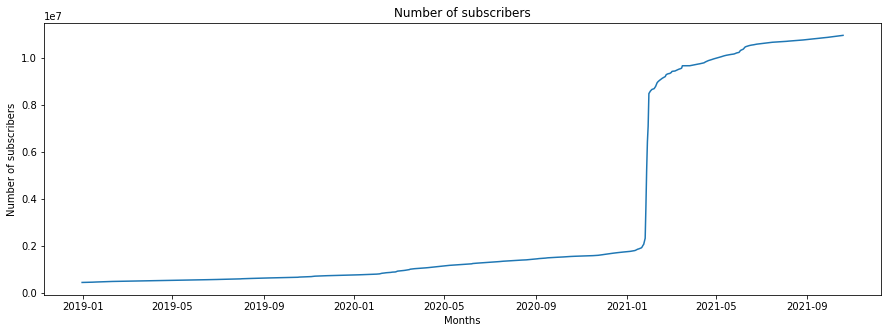

In [ ]:
df_subscribers = df.groupby(pd.Grouper(freq="D"))["subreddit_subscribers"].nth(-1)
# print(df_subscribers)

plt.figure(figsize=(15,5))
plt.plot(df_subscribers)
plt.xlabel("Months")
plt.ylabel("Number of subscribers")
plt.title("Number of subscribers")
plt.show()

## 3.3. Number of submissions by flair

In [ ]:
df_flairs = df.groupby("link_flair_text")["link_flair_text"].count().sort_values(ascending=False)
print(f"{len(df_flairs)} flair categories:\n{df_flairs.index.values}\n")
print(f"Top 15 flair count:\n{df_flairs.head(15)}")

41 flair categories:
['Discussion' 'Meme' 'YOLO' 'News' 'Gain' 'NA' 'Shitpost' 'DD' 'Loss'
 'Chart' 'Options' 'Technical Analysis' 'Stocks' 'Fundamentals' 'Satire'
 'Storytime' 'Technicals' 'Futures' 'Daily Discussion' 'Donation'
 'Earnings Thread' 'Forex' 'Weekend Discussion' 'WSBbooks' 'Mods' 'Banned'
 'Announcement' 'Gay' 'Gods' 'GME Thread' "IT'S ACTUALLY GOOD"
 'Literally 10 minutes long' 'Megathread' 'Mods - Regarding MrBeast Post'
 'Mods - Rule Reminder' 'Official' 'Tendies'
 'Thank you, silent participants!' "Tuesday 2-Feb. I'm retarded" 'Welcome'
 'dogshitpost']

Top 15 flair count:
link_flair_text
Discussion            205819
Meme                  167222
YOLO                  115197
News                   76494
Gain                   68053
NA                     47126
Shitpost               41965
DD                     41397
Loss                   40540
Chart                  11294
Options                 9785
Technical Analysis      9755
Stocks                  8698
Fundamen

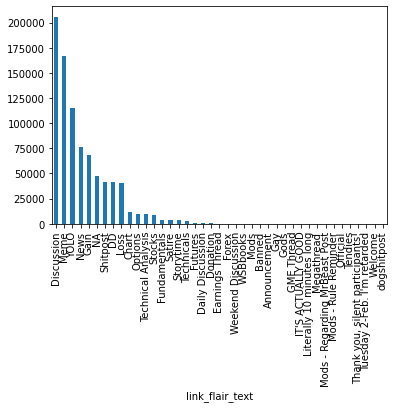

In [ ]:
df_flairs.plot.bar()

## 3.4. Top authors by submissions

In [ ]:
df_authors = df.groupby("author")["author"].count().sort_values(ascending=False)
print(f"Top 15 authors:\n{df_authors.head(15)}")


Top 15 authors:
author
[deleted]               31133
Onboarding92             1103
WSBVoteBot               1094
AutoModerator             923
OPINION_IS_UNPOPULAR      498
1poundbookingfee          310
WSBConsensus              304
bigbear0083               290
pdwp90                    239
patrickbateman02          225
RealPennyMuncher          223
btoned                    220
rawrtherapy               209
keenfeed                  182
Ned_Flanderz              179
Name: author, dtype: int64


In [6]:
df = pd.read_csv("/content/drive/MyDrive/WSB/WSB_submissions_all.csv", sep=";")
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')
df.index = pd.DatetimeIndex(df.created_utc)
df.tail()

,Unnamed: 0,author,created_utc,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio
created_utc,,,,,,,,,,,
2018-12-31 15:05:18,861747,Leading_Breath,2018-12-31 15:05:18,ab7upy,NaN,417,1,454678,NaN,"""I don't give a shit about Tesla I just want t...",0.0
2018-12-31 14:45:20,861748,skitty2,2018-12-31 14:45:20,ab7oz6,NaN,8,1,454674,The whole next year will be green.,If today closes green,0.0
2018-12-31 14:40:30,861749,Googs84,2018-12-31 14:40:30,ab7nkw,Shitpost,0,1,454672,Happy New Year to all you degenerates includin...,Happy New Year Degenerates,0.0
2018-12-31 14:34:10,861750,neocoff,2018-12-31 14:34:10,ab7lu7,NaN,7,1,454672,NaN,Chip stocks set for worst quarter in a decade....,0.0
2018-12-31 14:29:50,861751,Brodmann,2018-12-31 14:29:50,ab7km1,Discussion,2,1,454671,NaN,Aphria down 7% premarket; Questions Surface if...,0.0


# 2. Find Sentiment

## 2.1. Intialize pipline

<!-- ![nlp_pipeline](https://spacy.io/pipeline-fde48da9b43661abcdf62ab70a546d71.svg) -->

In [ ]:
pip install SpacyTextBlob

In [ ]:
# nlp = spacy.load("en_core_web_lg")
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.blank("en")
if "spacytextblob" not in nlp.pipe_names:
    nlp.add_pipe("spacytextblob")
    nlp.rename_pipe("spacytextblob", "sentiment")
print(nlp.pipe_names)

['sentiment']


## 2.2. Find sentiment

In [ ]:
df["title_polarity"] = 0.0
df["title_subjectivity"] = 0.0
df["body_polarity"] = 0.0
df["body_subjectivity"] = 0.0
df["polarity"] = 0.0
df["title_tokens"] = ""
df['title_tokens'] = df['title_tokens'].apply(list)
df["selftext_tokens"] ="" 
df['selftext_tokens'] = df['selftext_tokens'].apply(list)

def get_sentiment(title, body):
    nlp_title = nlp(title)
    nlp_body = nlp(str(body))
    title_tokens = [token.text for token in nlp_title]
    body_tokens = [token.text for token in nlp_body]
    #ngrams = ngrams.append(list(textacy.extract.basics.ngrams(nlp_title, 3)))
    #print(pd.Series([nlp_title._.polarity, nlp_title._.subjectivity,
    #                  nlp_body._.polarity, nlp_body._.subjectivity,title_tokens,body_tokens]))
    return pd.Series([nlp_title._.polarity, nlp_title._.subjectivity,
                      nlp_body._.polarity, nlp_body._.subjectivity,title_tokens,body_tokens])

df[["title_polarity", "title_subjectivity", "body_polarity", "body_subjectivity","title_tokens","selftext_tokens"]] = df.apply(lambda row: get_sentiment(row["title"], row["selftext"]), axis=1)
df["polarity"] = (df["title_polarity"] + df["body_polarity"])
df.head()

,Unnamed: 0,author,created_utc,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio,title_polarity,title_subjectivity,body_polarity,body_subjectivity,polarity,title_tokens,selftext_tokens
created_utc,,,,,,,,,,,,,,,,,,
2021-10-19 17:58:57,0,VendiVendiVendi,2021-10-19 17:58:57,qbh10s,Gain,0,1,10967090,So 13.56 cad for BB. It’s moving and gaining ...,BB,1.0,0.0,0.000000,-0.470378,0.516667,-0.470378,[BB],"[So, 13.56, cad, for, BB, ., , It, ’s, moving..."
2021-10-19 17:57:49,1,Far_Bass_7284,2021-10-19 17:57:49,qbh04w,News,1,1,10967087,NaN,Surely it is a coincidence.,1.0,0.5,0.888889,0.000000,0.000000,0.500000,"[Surely, it, is, a, coincidence, .]",[nan]
2021-10-19 17:55:24,2,HistoricalAnimator43,2021-10-19 17:55:24,qbgyco,YOLO,0,1,10967076,NaN,yolo sava options,1.0,0.0,0.000000,0.000000,0.000000,0.000000,"[yolo, sava, options]",[nan]
2021-10-19 17:54:51,3,ZaRaWi,2021-10-19 17:54:51,qbgxy8,YOLO,0,1,10967076,NaN,meme,1.0,0.0,0.000000,0.000000,0.000000,0.000000,[meme],[nan]
2021-10-19 17:52:33,4,CuteInterest1884,2021-10-19 17:52:33,qbgw9u,DD,0,1,10967075,"BB is on the move higher, not because of the p...",BB,1.0,0.0,0.000000,0.168254,0.506349,0.168254,[BB],"[BB, is, on, the, move, higher, ,, not, becaus..."


In [ ]:
df.to_csv("/content/drive/MyDrive/WSB/WSB_submissions_features_spacy.csv", sep=";")

## 2.3. Group by day

In [ ]:
df_polarity = df.groupby(pd.Grouper(freq="D"))[["polarity"]].mean()
df_polarity = df_polarity.fillna(0)
display(df_polarity.head())

,polarity
created_utc,
2018-12-31,0.044122
2019-01-01,0.076531
2019-01-02,0.065572
2019-01-03,0.098842
2019-01-04,0.082731


##  choice of words, n-grams/phrases, ticker extraction

In [ ]:
pip install textacy

In [ ]:
import textacy
bigrams_title = []
trigrams_title = []

def get_ngrams(title,n):
    nlp_title = nlp(str(title)) 
    f.write("%s\n" % list(textacy.extract.basics.ngrams(nlp_title, n, filter_stops=True, filter_punct=True, filter_nums=False)))




In [ ]:
with open('/content/drive/MyDrive/WSB/bigrams_title_.txt', 'a') as f: 
 df.apply(lambda row: get_ngrams(row["title"],2), axis=1)
    
with open('/content/drive/MyDrive/WSB/trigrams_title_.txt', 'a') as f:
 df.apply(lambda row: get_ngrams(row["title"],3), axis=1)

In [ ]:
    
with open('/content/drive/MyDrive/WSB/bigrams_selftext_.txt', 'a') as f:
 df.apply(lambda row: get_ngrams(row["selftext"],2), axis=1)
 
with open('/content/drive/MyDrive/WSB/trigrams_selftext_.txt', 'a') as f:
 df.apply(lambda row: get_ngrams(row["selftext"],3), axis=1)

##Frequency of N-grams

In [ ]:
# read a line from a file as a list of ngrams
# create a list of all ngrams
# calculate freq.
# wordcloud 

import ast
bigrams_title = []
with open('/content/drive/MyDrive/WSB/bigrams_title_.txt',encoding="utf-8") as f:
 lines = f.read().splitlines() 


In [ ]:
import re
bigrams_title = []
for lst in lines:  
  for bigram in lst.split(','):    
    bigram=re.sub('[[]', '', bigram)
    bigram=re.sub('[]]', '', bigram)
    if bigram != '':      
      bigrams_title.append(bigram.lower())
print(bigrams_title[0:50])
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Possible nested set at position 1
  """


['yolo sava', ' sava options', 'sitting ape', ' charging bull', 'prog yolo', ' yolo 1.5', ' 1.5 yrs', 'hedge funds', ' $hood', '$372k', ' 372k gains', ' tsla deliveries', 'bit lol', ' lol 😂', '💎🤲', ' 🤲🏾', ' 🏾 bb', ' bb 🚀', ' 🚀🚀', ' 🚀🚀', ' 🚀🚀', ' 🚀🚀', 'goal fulfilled', 'wsb apes', ' apes 20', ' 20 years', ' years later', 'tsla earnings', ' earnings prediction', ' beat estimates', 'fuk ur', ' ur puts', 'guys think', 'crude oil', ' $100', ' dec. 2021', ' bad bet', ' $200', ' 2022 aside', ' aug. 20th', 'spac merger', ' merger dd', 'fuck yeah', 'hedge funds', ' playtika holding', ' holding corp.', '$adxs', ' adxs continue', 'anybody watching', '$tlry']


In [ ]:
count_freq = {}
for item in bigrams_title:
    item = item.strip()
    if item in count_freq:
        count_freq[item] +=1
    else:
        count_freq[item] = 1

In [ ]:
sorted_two_grams = sorted(count_freq.items(), key=lambda item: item[1], reverse = True)
print(sorted_two_grams[:100])

[('🚀🚀', 184141), ('$gme', 14145), ('💎🙌', 13582), ('💎💎', 12363), ('🚀 🚀', 7277), ('🦍🦍', 6344), ('diamond hands', 5799), ('$amc', 5797), ('gonna', 5498), ('moon 🚀', 5310), ('short squeeze', 5083), ('wall street', 4999), ('🚀💎', 4389), ('hedge funds', 4256), ('$bb', 4089), ('000', 3920), ('short interest', 3651), ('💎👐', 3564), ('🙌💎', 3520), ('💎🤲', 3502), ('🌈🐻', 3345), ('💎🚀', 3305), ('loss porn', 3042), ('stock market', 2844), ('buy gme', 2764), ('looks like', 2746), ('💎✋', 2619), ('🚀🌕', 2565), ('gme 🚀', 2449), ('🔥🔥', 2412), ('$nok', 2389), ('🙌🏻', 2375), ('$wish', 2329), ('$$', 2325), ('hedge fund', 2209), ('$tsla', 1993), ('🙌🏼', 1987), ('buy buy', 1958), ('$1', 1916), ('💎 🙌', 1896), ('hold hold', 1831), ('market manipulation', 1821), ('$100', 1804), ('🦍🚀', 1804), ('moon🚀', 1758), ('$clov', 1681), ('elon musk', 1614), ('♂️', 1606), ('🙌🚀', 1572), ('🙌🙌', 1521), ('💎🤚', 1506), ('gme $', 1484), ('paper hands', 1468), ('📈📈', 1459), ('😂😂', 1453), ('honest work', 1445), ('financial advice', 1445), (

In [ ]:
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import nltk
from nltk.util import ngrams
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

#word_fd = nltk.FreqDist(filtered_sentence)
bigram_fd = nltk.FreqDist(nltk.bigrams(bigrams_title))



In [ ]:
bigram_fd.most_common(10)

[((' 🚀🚀', ' 🚀🚀'), 125438),
 ((' 💎💎', ' 💎💎'), 6189),
 (('🚀🚀', ' 🚀🚀'), 5032),
 ((' 🚀 🚀', ' 🚀 🚀'), 3596),
 ((' 🦍🦍', ' 🦍🦍'), 3477),
 ((' moon 🚀', ' 🚀🚀'), 2228),
 ((' 🚀🚀', ' 🚀💎'), 2133),
 ((' 💎🙌', ' 🙌💎'), 1819),
 ((' 🙌💎', ' 💎🙌'), 1502),
 (('moon 🚀', ' 🚀🚀'), 1350)]

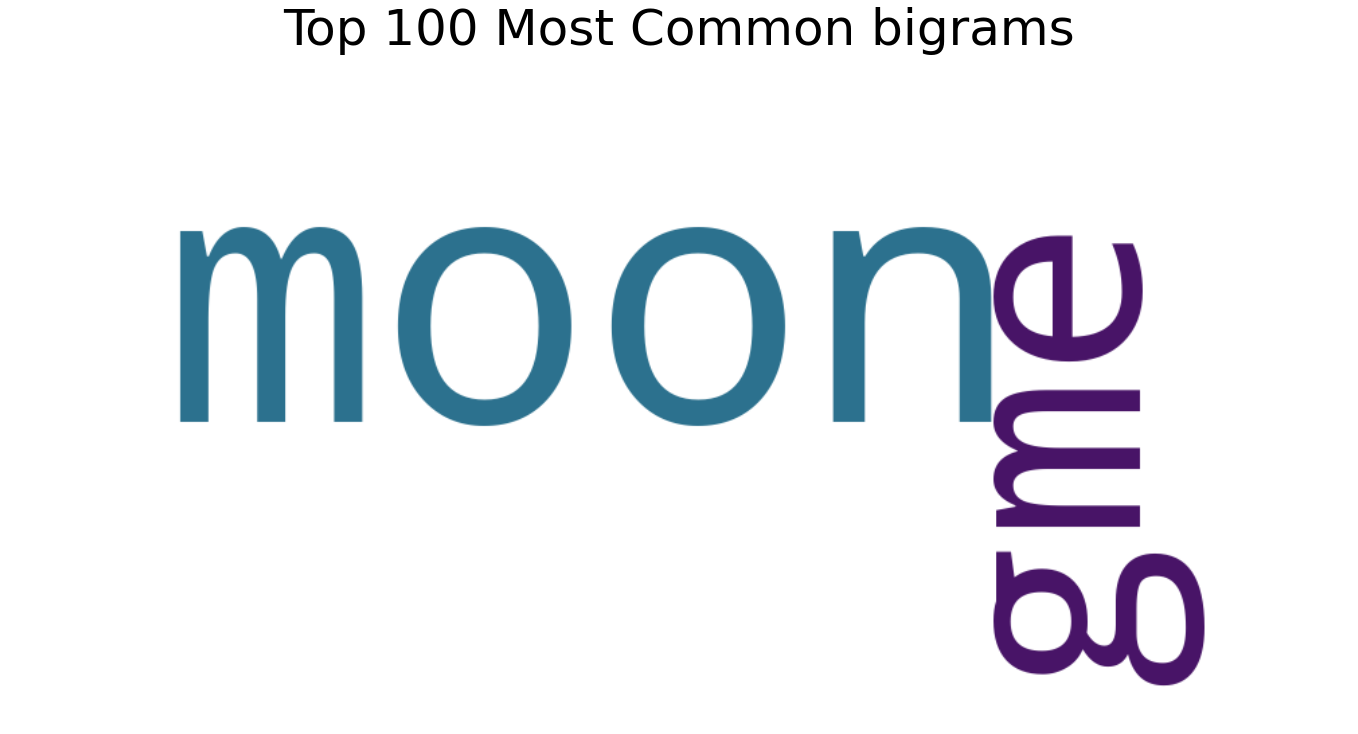

In [ ]:
mostcommon = bigram_fd.most_common(20)
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common bigrams', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

In [ ]:
with open('/content/drive/MyDrive/WSB/trigrams_title_.txt',encoding="utf-8") as f:
 lines = f.read().splitlines() 

trigrams_title = []
for lst in lines:  
  for trigram in lst.split(','):    
    trigram=re.sub('[[]', '', trigram)
    trigram=re.sub('[]]', '', trigram)
    if trigram != '':      
      trigrams_title.append(trigram.lower())
print(trigrams_title[0:50])

['yolo sava options', 'ape is strong', 'prog yolo 1.5', ' yolo 1.5 yrs', 'menace to hedge', ' funds by squeezing', ' squeezing their shorts', ' shorts of $', '$372k gains', ' gains from tsla', ' deliveries and pre', 'future and help', ' help a bit', ' bit lol 😂', '💎🤲🏾', ' 🤲🏾 bb', ' 🏾 bb 🚀', ' bb 🚀🚀', ' 🚀🚀🚀', ' 🚀🚀🚀', ' 🚀🚀🚀', 'trying to understand', ' understand why amc', ' amc and gme', 'wsb apes 20', ' apes 20 years', ' 20 years later', 'tsla earnings prediction', 'fuk ur puts', ' puts he said', 'wish to 10', 'oil to $', ' 100 by dec.', ' wagers on options', ' options of crude', ' crude to $', ' 200 in 2022', ' return since aug.', 'bowx we spac', ' spac merger dd', 'funds are piling', ' piling into playtika', ' playtika holding corp.', '$adxs continue', ' continue to buy', 'y’all thoughts', 'tlry is moving', ' moving big today', ' weed smokers rejoice', 'oil to $']


In [ ]:
count_freq_trigrams = {}
for item in trigrams_title:
    item = item.strip()
    if item in count_freq_trigrams:
        count_freq_trigrams[item] +=1
    else:
        count_freq_trigrams[item] = 1

In [ ]:
sorted_tri_grams = sorted(count_freq_trigrams.items(), key=lambda item: item[1], reverse = True)
print(sorted_tri_grams[:100])

[('🚀🚀🚀', 130366), ('💎💎💎', 6617), ('hold the line', 6170), ('🚀 🚀 🚀', 3823), ('🦍🦍🦍', 3664), ('like the stock', 3651), ('moon 🚀🚀', 3578), ('buy the dip', 2905), ('gme and amc', 2526), ('🚀🚀💎', 2199), ('000', 2145), ('💎🙌💎', 1988), ('gme 🚀🚀', 1633), ('buy and hold', 1588), ('🙌💎🙌', 1530), ('💎🙌🏻', 1498), ('💎🙌🚀', 1412), ('🔥🔥🔥', 1409), ('moon🚀🚀', 1373), ('💎🚀🚀', 1356), ('$$$', 1331), ('💎🙌🏼', 1259), ('$gme $', 1197), ('amc and gme', 1176), ('time to buy', 1020), ('🚀🚀🌕', 1013), ('hold hold hold', 1003), ('🚀💎🙌', 999), ('buy buy buy', 980), ('💎💎🙌', 939), ('🚀💎💎', 928), ('🙌🙌🙌', 846), ('apes together strong', 804), ('$amc $', 802), ('🌕🌕🌕', 802), ('🙌🚀🚀', 799), ('📈📈📈', 796), ('like this stock', 782), ('shares of gme', 768), ('\u200d♂️', 742), ('holding the line', 707), ('bought the dip', 693), ('🚀 🚀🚀', 685), ('gme $amc', 662), ('💎💎🚀', 658), ('wall street bets', 656), ('daily discussion thread', 655), ('amc 🚀🚀', 653), ('😂😂😂', 631), ('wish me luck', 618), ('🦍🚀🚀', 618), ('💎👐💎', 608), ('$gme 🚀', 606), ('wife’

In [ ]:
trigram_fd = nltk.FreqDist(nltk.trigrams(trigrams_title))
trigram_fd.most_common(10)

[((' 🚀🚀🚀', ' 🚀🚀🚀', ' 🚀🚀🚀'), 63768),
 ((' 💎💎💎', ' 💎💎💎', ' 💎💎💎'), 2062),
 (('🚀🚀🚀', ' 🚀🚀🚀', ' 🚀🚀🚀'), 1499),
 ((' 🚀 🚀 🚀', ' 🚀 🚀 🚀', ' 🚀 🚀 🚀'), 1336),
 ((' 🦍🦍🦍', ' 🦍🦍🦍', ' 🦍🦍🦍'), 1274),
 ((' moon 🚀🚀', ' 🚀🚀🚀', ' 🚀🚀🚀'), 860),
 ((' 🚀🚀🚀', ' 🚀🚀🚀', ' 🚀🚀💎'), 758),
 ((' 💎🙌💎', ' 🙌💎🙌', ' 💎🙌💎'), 737),
 ((' 🙌💎🙌', ' 💎🙌💎', ' 🙌💎🙌'), 694),
 (('moon 🚀🚀', ' 🚀🚀🚀', ' 🚀🚀🚀'), 627)]

## Extract Tickers -start with $

In [4]:
nasdaq_stocks = pd.read_csv("/content/drive/MyDrive/WSB/nasdaq.csv", sep=",")
nasdaq_stocks_symbols = nasdaq_stocks["Symbol"].tolist()

In [5]:
# Function to find stocks in a text given stock list
import re
regex = re.compile("[^a-zA-Z ]")
ticker_set = set(nasdaq_stocks_symbols)
#list(filter(lambda word: word[0]=='s', text.split()))

def calculate_mentioned_stocks(title, body=""):
    #content = regex.sub("", str(title) + " " + str(body)).split(" ")
    text = str(title) + " " + str(body)   
    tick_list = list(filter(lambda word: word[0]=='$', text.split())) 
    content = set(list([i[1:] for i in tick_list]))
    tickers = str(list(ticker_set & content))    
    return pd.Series([tickers])

def sanitize_column(column):
    #print(str(column))
    column = str(column).replace("[],", "").replace("[]", "").replace("],[", ",").replace("][", ",")
    return column

In [7]:
#df[["tickers"]] = df.apply(lambda x: calculate_mentioned_stocks(x["title"],x["selftext"]), axis=1)
df[['tickers_']] = df.apply(lambda x: calculate_mentioned_stocks(x["title"],x["selftext"]), axis=1)

In [8]:
df[['tickers_']] = df['tickers_'].apply(sanitize_column)

In [75]:
df['tickers_'].tolist()[:10]

['', '', '', '', '', '', '', '', '', "['HOOD']"]

In [28]:
#df_daily.index = pd.DatetimeIndex(df_NLP.created_utc)
df_daily_title_sentiment = df.groupby(pd.Grouper(freq="D")).agg({'tickers_': 'sum'})
df_daily = pd.concat([df_daily_title_sentiment], axis=1)
df_daily.head()

,tickers_
created_utc,
2018-12-31,['ATVI']['ATVI']
2019-01-01,"['ULTA']['GS', 'WFC']['TSLA']['BBBY']"
2019-01-02,['MU']['TWTR']['PEP']['AAPL']
2019-01-03,['FB']['AAPL']['AAPL']['TSLA']['AAPL']['NFLX']...
2019-01-04,['AAPL']['TSLA']['F']['AXDX']['NFLX']['SQ']['D...


In [78]:
df_daily['tickers']= df_daily['tickers_'].apply(lambda x: sanitize_column(x))

In [79]:
df_daily.head(10)

,tickers_,tickers
created_utc,,
2018-12-31,['ATVI']['ATVI'],"['ATVI','ATVI']"
2019-01-01,"['ULTA']['GS', 'WFC']['TSLA']['BBBY']","['ULTA','GS', 'WFC','TSLA','BBBY']"
2019-01-02,['MU']['TWTR']['PEP']['AAPL'],"['MU','TWTR','PEP','AAPL']"
2019-01-03,['FB']['AAPL']['AAPL']['TSLA']['AAPL']['NFLX']...,"['FB','AAPL','AAPL','TSLA','AAPL','NFLX','AAPL..."
2019-01-04,['AAPL']['TSLA']['F']['AXDX']['NFLX']['SQ']['D...,"['AAPL','TSLA','F','AXDX','NFLX','SQ','DELL']"
2019-01-05,['PCG'],['PCG']
2019-01-06,"['TSLA']['SNAP']['EA']['SNAP']['SQ', 'BAC']['X...","['TSLA','SNAP','EA','SNAP','SQ', 'BAC','X','DIS']"
2019-01-07,"['AMD']['NIO', 'TSLA']['TSLA']['SNAP']['AMD'][...","['AMD','NIO', 'TSLA','TSLA','SNAP','AMD','TSLA..."
2019-01-08,"['LULU']['TSLA']['USA']['MU']['AAPL', 'TSLA'][...","['LULU','TSLA','USA','MU','AAPL', 'TSLA','ROKU..."


In [81]:
#count stocks
from collections import Counter, defaultdict
import ast
df_daily["tickers"] =df_daily["tickers"].str.strip("[]").str.split(",")
df_daily["tickers_count"] = df_daily.apply(lambda x: dict(Counter(list(x['tickers']))), axis=1)

In [82]:
df_daily.head(8)

,tickers_,tickers,tickers_count
created_utc,,,
2018-12-31,['ATVI']['ATVI'],"['ATVI', 'ATVI']",{''ATVI'': 2}
2019-01-01,"['ULTA']['GS', 'WFC']['TSLA']['BBBY']","['ULTA', 'GS', 'WFC', 'TSLA', 'BBBY']","{''ULTA'': 1, ''GS'': 1, ' 'WFC'': 1, ''TSLA''..."
2019-01-02,['MU']['TWTR']['PEP']['AAPL'],"['MU', 'TWTR', 'PEP', 'AAPL']","{''MU'': 1, ''TWTR'': 1, ''PEP'': 1, ''AAPL'': 1}"
2019-01-03,['FB']['AAPL']['AAPL']['TSLA']['AAPL']['NFLX']...,"['FB', 'AAPL', 'AAPL', 'TSLA', 'AAPL', 'NFLX',...","{''FB'': 1, ''AAPL'': 5, ''TSLA'': 1, ''NFLX''..."
2019-01-04,['AAPL']['TSLA']['F']['AXDX']['NFLX']['SQ']['D...,"['AAPL', 'TSLA', 'F', 'AXDX', 'NFLX', 'SQ', 'D...","{''AAPL'': 1, ''TSLA'': 1, ''F'': 1, ''AXDX'':..."
2019-01-05,['PCG'],['PCG'],{''PCG'': 1}
2019-01-06,"['TSLA']['SNAP']['EA']['SNAP']['SQ', 'BAC']['...","['TSLA', 'SNAP', 'EA', 'SNAP', 'SQ', 'BAC', '...","{''TSLA'': 1, ''SNAP'': 2, ''EA'': 1, ''SQ'': ..."
2019-01-07,"['AMD']['NIO', 'TSLA']['TSLA']['SNAP']['AMD']...","['AMD', 'NIO', 'TSLA', 'TSLA', 'SNAP', 'AMD',...","{''AMD'': 3, ''NIO'': 1, ' 'TSLA'': 1, ''TSLA'..."


In [102]:
from numpy.core.numeric import NaN
from collections import defaultdict

def agg_counter_objs(rows):
    if ((rows == '') | (rows == NaN)):
        return 0
    new_counter_objs = []
    rows= ast.literal_eval(rows)
    def default_val():
        return 0
        
    new_dict = defaultdict(default_val)
    #print(rows)
    test_dict = Counter(rows)
    for key in test_dict.keys():
        new_key = key.replace("'","").replace('"',"").replace("]","").replace("\\","").strip()
        new_dict[new_key] += test_dict[key]
            
    if "" in new_dict.keys():
        del new_dict[""]
            
    new_counter_objs.append(Counter(new_dict))
        
    agg_counter_obj = Counter({})
    for obj in new_counter_objs:
        agg_counter_obj += obj        
    return (str(dict(agg_counter_obj)))

In [83]:
df_daily['tickers_count_'] = df_daily["tickers_count"].apply(agg_counter_objs)

In [84]:
df_daily.head(10)

,tickers_,tickers,tickers_count,tickers_count_
created_utc,,,,
2018-12-31,['ATVI']['ATVI'],"['ATVI', 'ATVI']",{''ATVI'': 2},{'ATVI': 2}
2019-01-01,"['ULTA']['GS', 'WFC']['TSLA']['BBBY']","['ULTA', 'GS', 'WFC', 'TSLA', 'BBBY']","{''ULTA'': 1, ''GS'': 1, ' 'WFC'': 1, ''TSLA''...","{'ULTA': 1, 'GS': 1, 'WFC': 1, 'TSLA': 1, 'BBB..."
2019-01-02,['MU']['TWTR']['PEP']['AAPL'],"['MU', 'TWTR', 'PEP', 'AAPL']","{''MU'': 1, ''TWTR'': 1, ''PEP'': 1, ''AAPL'': 1}","{'MU': 1, 'TWTR': 1, 'PEP': 1, 'AAPL': 1}"
2019-01-03,['FB']['AAPL']['AAPL']['TSLA']['AAPL']['NFLX']...,"['FB', 'AAPL', 'AAPL', 'TSLA', 'AAPL', 'NFLX',...","{''FB'': 1, ''AAPL'': 5, ''TSLA'': 1, ''NFLX''...","{'FB': 1, 'AAPL': 5, 'TSLA': 1, 'NFLX': 1, 'SW..."
2019-01-04,['AAPL']['TSLA']['F']['AXDX']['NFLX']['SQ']['D...,"['AAPL', 'TSLA', 'F', 'AXDX', 'NFLX', 'SQ', 'D...","{''AAPL'': 1, ''TSLA'': 1, ''F'': 1, ''AXDX'':...","{'AAPL': 1, 'TSLA': 1, 'F': 1, 'AXDX': 1, 'NFL..."
2019-01-05,['PCG'],['PCG'],{''PCG'': 1},{'PCG': 1}
2019-01-06,"['TSLA']['SNAP']['EA']['SNAP']['SQ', 'BAC']['...","['TSLA', 'SNAP', 'EA', 'SNAP', 'SQ', 'BAC', '...","{''TSLA'': 1, ''SNAP'': 2, ''EA'': 1, ''SQ'': ...","{'TSLA': 1, 'SNAP': 2, 'EA': 1, 'SQ': 1, 'BAC'..."
2019-01-07,"['AMD']['NIO', 'TSLA']['TSLA']['SNAP']['AMD']...","['AMD', 'NIO', 'TSLA', 'TSLA', 'SNAP', 'AMD',...","{''AMD'': 3, ''NIO'': 1, ' 'TSLA'': 1, ''TSLA'...","{'AMD': 3, 'NIO': 1, 'TSLA': 4, 'SNAP': 1}"
2019-01-08,"['LULU']['TSLA']['USA']['MU']['AAPL', 'TSLA']...","['LULU', 'TSLA', 'USA', 'MU', 'AAPL', 'TSLA',...","{''LULU'': 1, ''TSLA'': 1, ''USA'': 1, ''MU'':...","{'LULU': 1, 'TSLA': 2, 'USA': 1, 'MU': 1, 'AAP..."


In [85]:
df_daily = df_daily[['tickers','tickers_count_']]

In [86]:
df_daily.head()

,tickers,tickers_count_
created_utc,,
2018-12-31,"['ATVI', 'ATVI']",{'ATVI': 2}
2019-01-01,"['ULTA', 'GS', 'WFC', 'TSLA', 'BBBY']","{'ULTA': 1, 'GS': 1, 'WFC': 1, 'TSLA': 1, 'BBB..."
2019-01-02,"['MU', 'TWTR', 'PEP', 'AAPL']","{'MU': 1, 'TWTR': 1, 'PEP': 1, 'AAPL': 1}"
2019-01-03,"['FB', 'AAPL', 'AAPL', 'TSLA', 'AAPL', 'NFLX',...","{'FB': 1, 'AAPL': 5, 'TSLA': 1, 'NFLX': 1, 'SW..."
2019-01-04,"['AAPL', 'TSLA', 'F', 'AXDX', 'NFLX', 'SQ', 'D...","{'AAPL': 1, 'TSLA': 1, 'F': 1, 'AXDX': 1, 'NFL..."


In [87]:
df_daily.to_csv("/content/drive/MyDrive/WSB/WSB_daily_ticker_count.csv", sep=";")

In [ ]:
df["tickers"] = df["tickers"].apply(sanitize_column)

In [88]:
df.head(10)

,Unnamed: 0,author,created_utc,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio,tickers_
created_utc,,,,,,,,,,,,
2021-10-19 17:58:57,0,VendiVendiVendi,2021-10-19 17:58:57,qbh10s,Gain,0,1,10967090,So 13.56 cad for BB. It’s moving and gaining ...,BB,1.0,
2021-10-19 17:57:49,1,Far_Bass_7284,2021-10-19 17:57:49,qbh04w,News,1,1,10967087,NaN,Surely it is a coincidence.,1.0,
2021-10-19 17:55:24,2,HistoricalAnimator43,2021-10-19 17:55:24,qbgyco,YOLO,0,1,10967076,NaN,yolo sava options,1.0,
2021-10-19 17:54:51,3,ZaRaWi,2021-10-19 17:54:51,qbgxy8,YOLO,0,1,10967076,NaN,meme,1.0,
2021-10-19 17:52:33,4,CuteInterest1884,2021-10-19 17:52:33,qbgw9u,DD,0,1,10967075,"BB is on the move higher, not because of the p...",BB,1.0,
2021-10-19 17:51:29,5,Farm1970,2021-10-19 17:51:29,qbgvh0,Discussion,0,1,10967072,NaN,SDIG,1.0,
2021-10-19 17:50:55,6,UN9NOWN,2021-10-19 17:50:55,qbgv2y,Meme,0,1,10967071,NaN,A Sitting Ape Is strong against a charging Bull,1.0,
2021-10-19 17:47:50,7,roastintheoven,2021-10-19 17:47:50,qbgspe,Discussion,0,1,10967055,NaN,Is this the inspiration,1.0,
2021-10-19 17:46:50,8,Fuckhedgiez,2021-10-19 17:46:50,qbgs0r,YOLO,0,1,10967058,NaN,PROG YOLO 1.5 yrs out,1.0,


In [ ]:
df['tickers_count'] = df["tickers_"].apply(agg_counter_objs)

In [104]:
df.head(10)

,author,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio,tickers_,tickers_count
created_utc,,,,,,,,,,,
2021-10-19 17:58:57,VendiVendiVendi,qbh10s,Gain,0,1,10967090,So 13.56 cad for BB. It’s moving and gaining ...,BB,1.0,,0
2021-10-19 17:57:49,Far_Bass_7284,qbh04w,News,1,1,10967087,NaN,Surely it is a coincidence.,1.0,,0
2021-10-19 17:55:24,HistoricalAnimator43,qbgyco,YOLO,0,1,10967076,NaN,yolo sava options,1.0,,0
2021-10-19 17:54:51,ZaRaWi,qbgxy8,YOLO,0,1,10967076,NaN,meme,1.0,,0
2021-10-19 17:52:33,CuteInterest1884,qbgw9u,DD,0,1,10967075,"BB is on the move higher, not because of the p...",BB,1.0,,0
2021-10-19 17:51:29,Farm1970,qbgvh0,Discussion,0,1,10967072,NaN,SDIG,1.0,,0
2021-10-19 17:50:55,UN9NOWN,qbgv2y,Meme,0,1,10967071,NaN,A Sitting Ape Is strong against a charging Bull,1.0,,0
2021-10-19 17:47:50,roastintheoven,qbgspe,Discussion,0,1,10967055,NaN,Is this the inspiration,1.0,,0
2021-10-19 17:46:50,Fuckhedgiez,qbgs0r,YOLO,0,1,10967058,NaN,PROG YOLO 1.5 yrs out,1.0,,0


In [103]:
df = df.drop(['Unnamed: 0','created_utc'],axis=1)

In [105]:
df.to_csv("/content/drive/MyDrive/WSB/WSB_submissions_features_tickers_count.csv", sep=";")